# Import Libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,f1_score
from sklearn.metrics import classification_report

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

# Lire le ficher donées :

In [2]:
data= pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Explorer l'analyse de donées :

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
data.shape

(768, 9)

In [6]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
data.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [8]:
#Statistics of data :
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
# Vérifier les valeurs manquantes
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [12]:
data.duplicated().sum()

np.int64(0)

# L'analyse util des données :

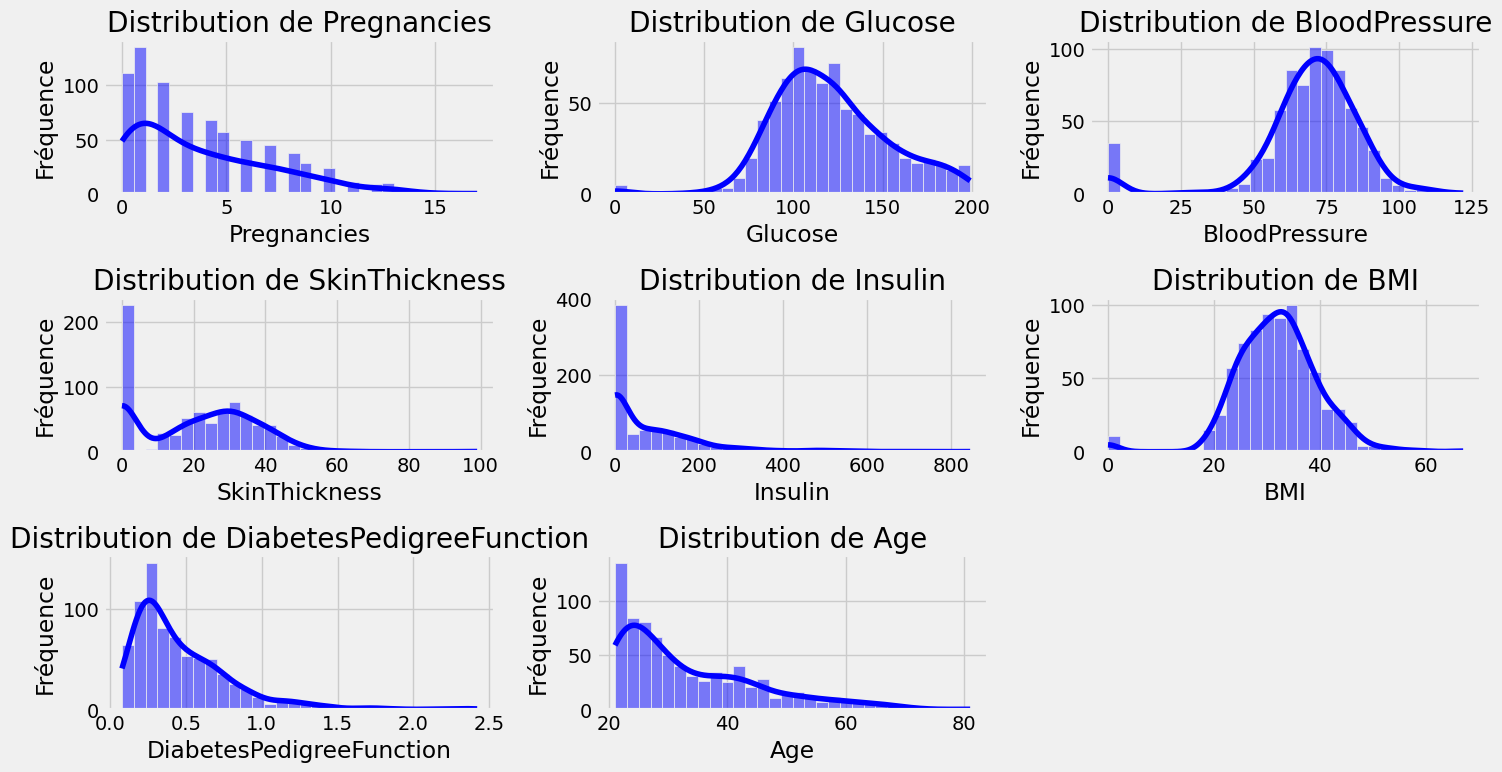

In [9]:
# Générer des histogrammes pour toutes les colonnes numériques
data_numeric = data.select_dtypes(include=['float64', 'int64']).drop(columns=['Outcome'])

plt.figure(figsize=(15, 10))
for i, col in enumerate(data_numeric.columns, start=1):
    plt.subplot(4, 3, i)  # Ajustez selon le nombre de colonnes
    sns.histplot(data[col], kde=True, color='blue', bins=30)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
plt.tight_layout()
plt.show()

<Axes: xlabel='Outcome', ylabel='count'>

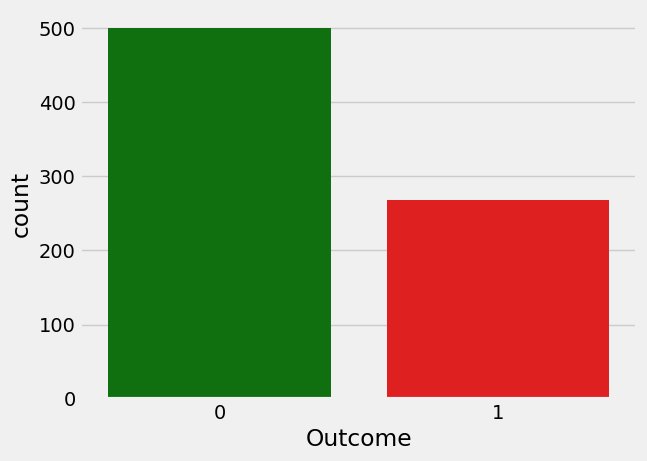

In [14]:
sns.countplot(x='Outcome', data=data , palette=['green','red'])

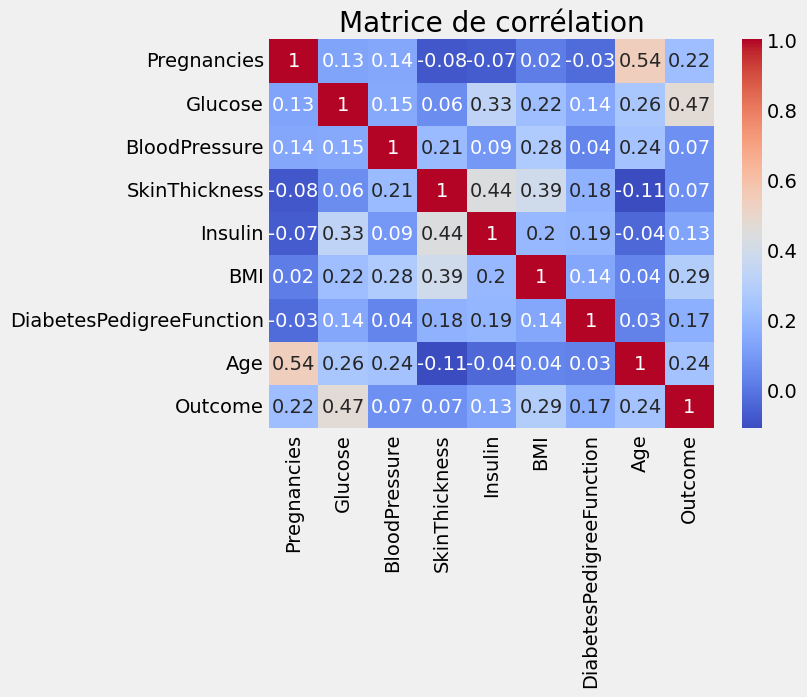

In [15]:
# Matrice de corrélation
correlation_matrix = data.corr().round(2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

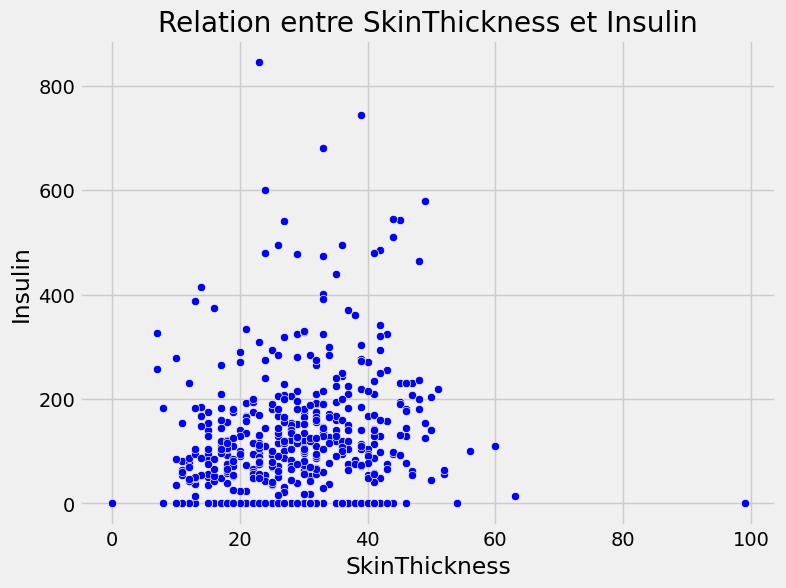

In [16]:
# Scatterplot pour visualiser la relation entre SkinThickness et Insulin
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['SkinThickness'], y=data['Insulin'], color='blue')
plt.title('Relation entre SkinThickness et Insulin')
plt.xlabel('SkinThickness')
plt.ylabel('Insulin')
plt.grid(True)
plt.show()

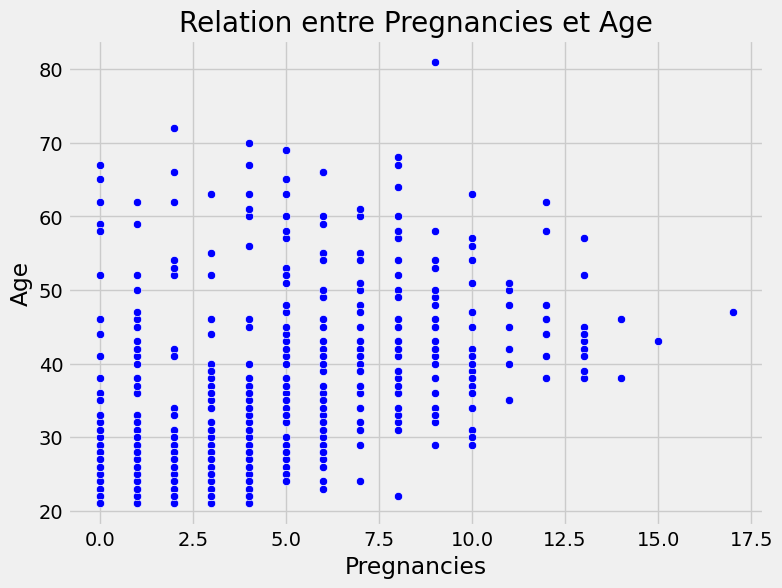

In [17]:
# Scatterplot pour visualiser la relation entre Pregnancies et Age
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Pregnancies'], y=data['Age'], color='blue')
plt.title('Relation entre Pregnancies et Age')
plt.xlabel('Pregnancies')
plt.ylabel('Age')
plt.grid(True)
plt.show()

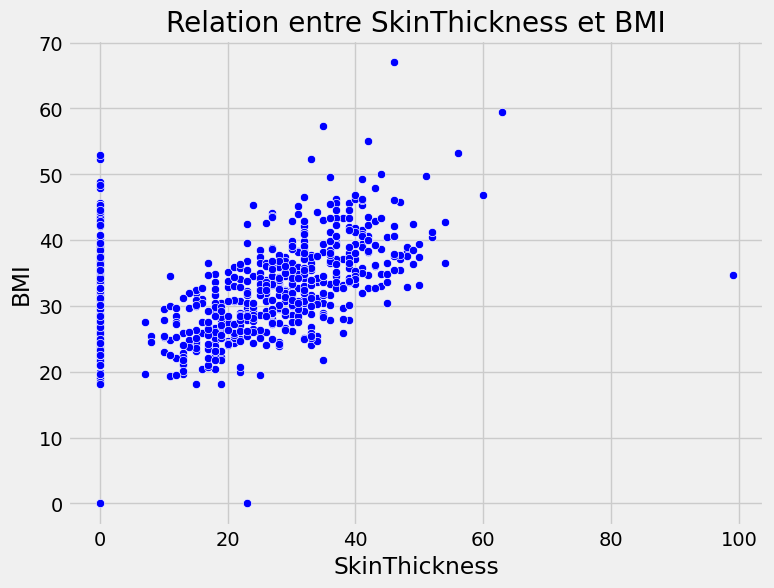

In [18]:
# Scatterplot pour visualiser la relation entre SkinThickness et BMI
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['SkinThickness'], y=data['BMI'], color='blue')
plt.title('Relation entre SkinThickness et BMI')
plt.xlabel('SkinThickness')
plt.ylabel('BMI')
plt.grid(True)
plt.show()

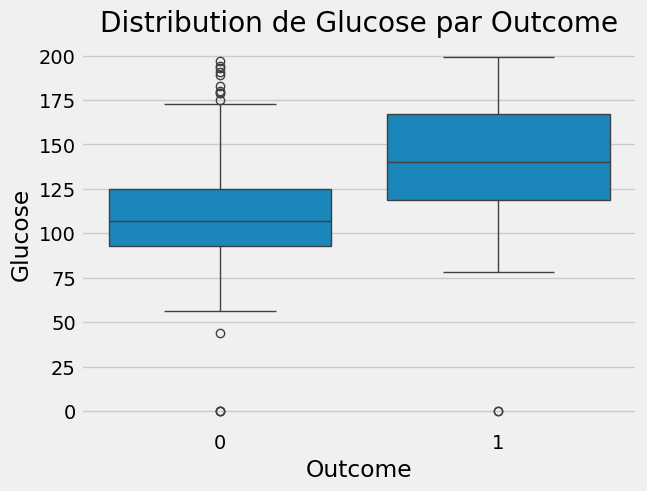

In [19]:
# Boxplot : Relation entre 'Outcome' et 'Glucose'
sns.boxplot(x=data['Outcome'], y=data['Glucose'])
plt.title('Distribution de Glucose par Outcome')
plt.show()

In [20]:
# Initialisation du rapport des valeurs aberrantes
outlier_report = []

# Boucle sur chaque colonne numérique
for col in data.select_dtypes(include=['float', 'int']).columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Détection des valeurs aberrantes
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_count = outliers.shape[0]
    total_count = data[col].shape[0]

    if outlier_count > 0:
        outlier_percentage = (outlier_count / total_count) * 100
        outlier_report.append({
            "Variable": col,
            "Nombre de valeurs aberrantes": outlier_count,
            "Pourcentage": round(outlier_percentage, 2)
        })

# Création d'un DataFrame pour le rapport
report_data = pd.DataFrame(outlier_report)

# Affichage du rapport
if not report_data.empty:
    print(report_data)
else:
    print("Aucune valeur aberrante détectée.")

                   Variable  Nombre de valeurs aberrantes  Pourcentage
0               Pregnancies                             4         0.52
1                   Glucose                             5         0.65
2             BloodPressure                            45         5.86
3             SkinThickness                             1         0.13
4                   Insulin                            34         4.43
5                       BMI                            19         2.47
6  DiabetesPedigreeFunction                            29         3.78
7                       Age                             9         1.17


# Nettoyage des données :

<Axes: >

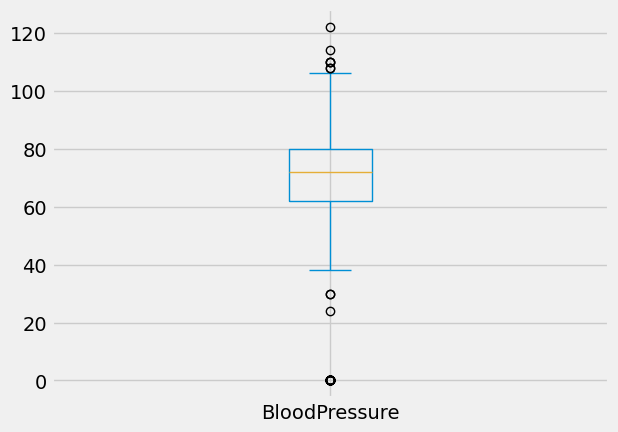

In [21]:
data['BloodPressure'].plot(kind='box')

In [23]:
# Calcul des limites de l'IQR
Q1 = data['BloodPressure'].quantile(0.25)  # Premier quartile
Q3 = data['BloodPressure'].quantile(0.75)  # Troisième quartile
IQR = Q3 - Q1  # Écart interquartile

lower_bound = Q1 - 1.5 * IQR  # Limite inférieure
upper_bound = Q3 + 1.5 * IQR  # Limite supérieure

# Calcul de la médiane
median = data['BloodPressure'].median()

# Remplacer les valeurs aberrantes par la médiane
data['BloodPressure'] = np.where((data['BloodPressure'] < lower_bound) | (data['BloodPressure'] > upper_bound), median, data['BloodPressure'])

<Axes: >

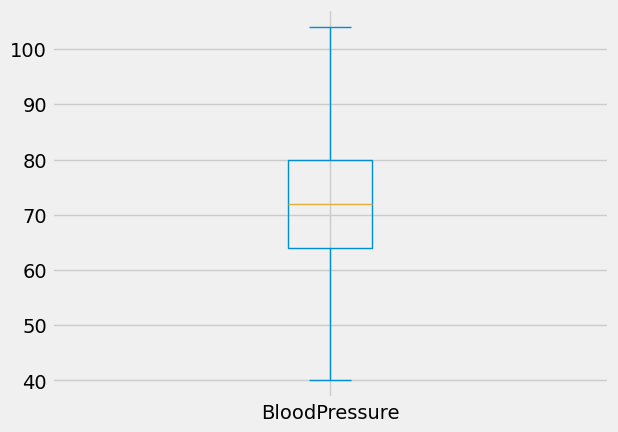

In [24]:
data['BloodPressure'].plot(kind='box')

<Axes: >

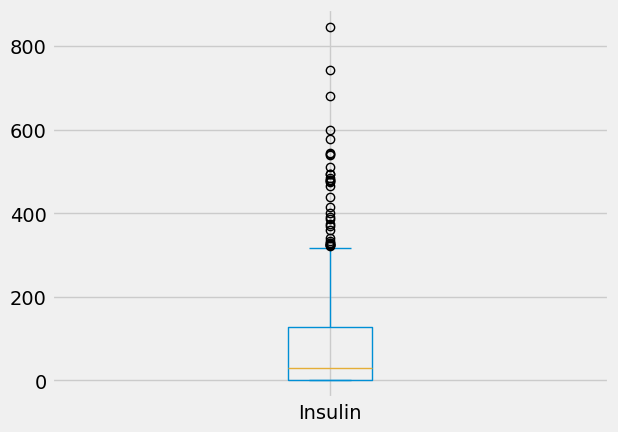

In [25]:
data['Insulin'].plot(kind='box')

In [26]:
# Calcul des limites de l'IQR
Q1 = data['Insulin'].quantile(0.25)  # Premier quartile
Q3 = data['Insulin'].quantile(0.75)  # Troisième quartile
IQR = Q3 - Q1  # Écart interquartile

lower_bound = Q1 - 1.5 * IQR  # Limite inférieure
upper_bound = Q3 + 1.5 * IQR  # Limite supérieure

# Calcul de la médiane
median = data['Insulin'].median()

# Remplacer les valeurs aberrantes par la médiane
data['Insulin'] = np.where((data['Insulin'] < lower_bound) | (data['Insulin'] > upper_bound), median, data['Insulin'])

<Axes: >

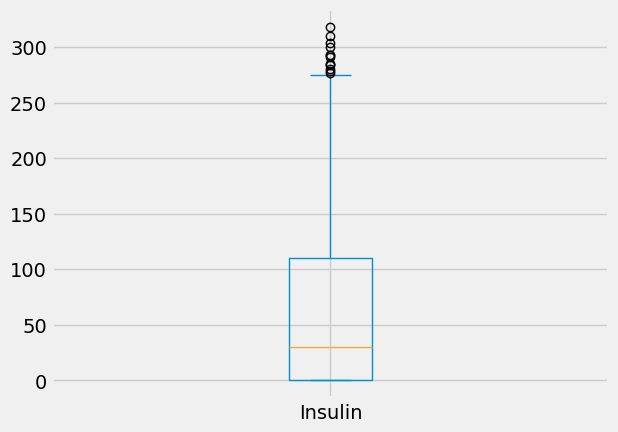

In [27]:
data['Insulin'].plot(kind='box')

<Axes: >

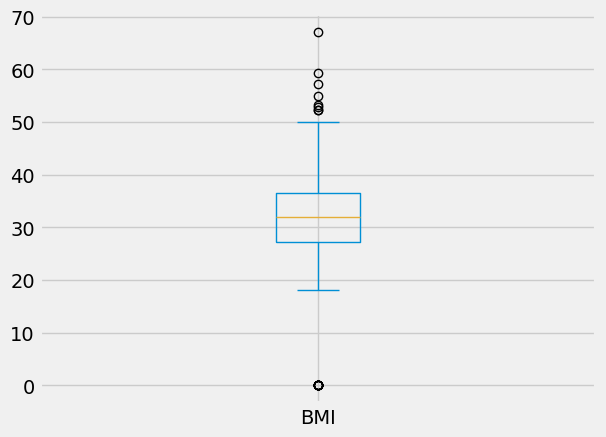

In [28]:
data['BMI'].plot(kind='box')

In [29]:
# Calcul des limites de l'IQR
Q1 = data['BMI'].quantile(0.25)  # Premier quartile
Q3 = data['BMI'].quantile(0.75)  # Troisième quartile
IQR = Q3 - Q1  # Écart interquartile

lower_bound = Q1 - 1.5 * IQR  # Limite inférieure
upper_bound = Q3 + 1.5 * IQR  # Limite supérieure

# Calcul de la médiane
median = data['BMI'].median()

# Remplacer les valeurs aberrantes par la médiane
data['BMI'] = np.where((data['BMI'] < lower_bound) | (data['BMI'] > upper_bound), median, data['BMI'])

<Axes: >

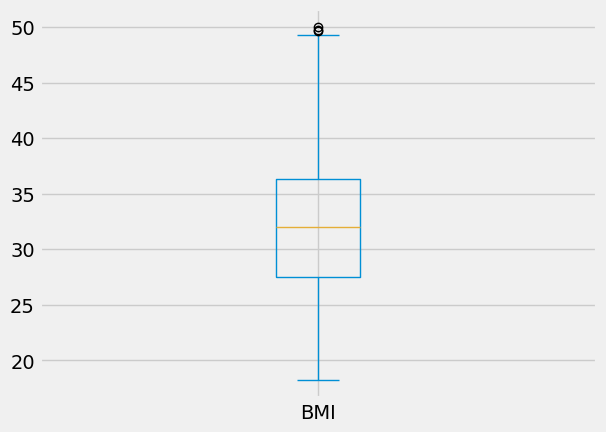

In [30]:
data['BMI'].plot(kind='box')

In [32]:
# Initialisation du rapport des valeurs aberrantes
outlier_report = []

# Boucle sur chaque colonne numérique
for col in data.select_dtypes(include=['float', 'int']).columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Détection des valeurs aberrantes
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_count = outliers.shape[0]
    total_count = data[col].shape[0]

    if outlier_count > 0:
        outlier_percentage = (outlier_count / total_count) * 100
        outlier_report.append({
            "Variable": col,
            "Nombre de valeurs aberrantes": outlier_count,
            "Pourcentage": round(outlier_percentage, 2)
        })

# Création d'un DataFrame pour le rapport
report_data = pd.DataFrame(outlier_report)

# Affichage du rapport
if not report_data.empty:
    print(report_data)
else:
    print("Aucune valeur aberrante détectée.")

                   Variable  Nombre de valeurs aberrantes  Pourcentage
0               Pregnancies                             4         0.52
1                   Glucose                             5         0.65
2             SkinThickness                             1         0.13
3                   Insulin                            13         1.69
4                       BMI                             3         0.39
5  DiabetesPedigreeFunction                            29         3.78
6                       Age                             9         1.17
